# <div dir = 'rtl'>پروژه پیوسته دو </div>
# <div dir = 'rtl'> مهتا پناهی، سینا ملاابراهیمی</div>

# فهرست مطالب

* [کتابخانه لازم](#کتابخانه-لازم)

* [پروژه اول](#پروژه-اول)

    * [مقدمه](##مقدمه)
    
    * [وارد کردن دیتا](##وارد-کردن-data-)

    

# <div dir ='rtl'>کتابخانه لازم </div>

In [50]:
import pandas as pd 
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
from factor_analyzer import FactorAnalyzer
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
import networkx as nx

# <div dir='rtl'> پروژه اول </div>

## <div dir='rtl'> مقدمه: </div>

## <div dir = 'rtl'> وارد کردن data :</div>


<div dir = 'rtl'>

در اینجا ما دیتا ی مورد نظر را از سایت <code> https://www.kaggle.com/datasets/puxama/bostoncsv </code > استخراج کردیم و توضیحات ستون به شرح زیر است :

crim: نرخ جرم و جنایت در هر نفر.

zn: درصد زمین‌های مسکونی با مساحت بیش از ۲۵۰۰۰ فوت مربع.

indus: درصد زمین‌های غیر مسکونی در هر شهر.

chas: متغیر مجازی (۱ اگر ملک در نزدیکی رودخانه چارلز باشد، ۰ در غیر این صورت).

nox: غلظت اکسید نیتروژن (قسمت در ۱۰ میلیون).

rm: میانگین تعداد اتاق‌ها در هر خانه.

age: درصد واحدهای مسکونی ساخته شده قبل از ۱۹۴۰.

dis: فاصله وزنی تا ۵ مرکز اشتغال در بوستون.

rad: شاخص دسترسی به بزرگراه‌های شعاعی.

tax: نرخ مالیات بر املاک در هر ۱۰,۰۰۰ دلار.

ptratio: نسبت دانش‌آموز به معلم در هر شهر.

black: ۱۰۰۰(Bk - 0.63)^2 که در آن Bk درصد سیاه‌پوستان در هر شهر است.

lstat: درصد جمعیت با وضعیت اقتصادی پایین.

medv: ارزش متوسط خانه‌ها (به هزار دلار).

</div>

In [2]:
df = pd.read_csv("C:/Users/Sina/Downloads/Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## <div dir = 'rtl'> انتخاب متغیر‍های مستقل برای تحلیل </div>
<div dir = 'rtl'>
ما برای تحلیل مسئله از متغیر های مستقل  <code>crim,indus,nox,age,dis,ptratio,black,lstat </code>  و متغیر پاسخ <code> medv </code>  استفاده میکنیم 
</div>

In [3]:
df_1 = df.iloc[:,[1,3,5,7,8,11,12,13,14]]
df_1

,crim,indus,nox,age,dis,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,54.2,6.0622,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,69.1,2.4786,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,76.7,2.2875,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,91.0,2.1675,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,89.3,2.3889,21.0,393.45,6.48,22.0


## <div dir = 'rtl'>مشاهده خصیصه های متغیرها </div>


In [4]:
df_1.describe()

,crim,indus,nox,age,dis,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,68.574901,3.795043,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,28.148861,2.105710,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,2.900000,1.129600,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,45.025000,2.100175,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,77.500000,3.207450,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,94.075000,5.188425,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,100.000000,12.126500,22.000000,396.900000,37.970000,50.000000


##  <div dir = 'rtl'>برازش مدل رگرسیون خطی </div>
<div dir = 'rtl'>
برای برازش مدل از کتابخانه  <code> sklearn </code> استفاده می کنیم 

 که در فاز اول داده ها را به دو قسمت  <code> train,test </code> تقسیم میکنیم 
 
 در فاز دوم به برازش مدل میپردازیم 

 در فاز سوم به تعیین ضرایب مدل میپردازیم 
 
 در فاز اخر به پیشبینی مقادیر  <code> test </code> می پردازیم 
</div>

### <div dir = 'rtl'> فاز اول </div>
<div dir = 'rtl'>
در ابتدا ما با استفاده از تابع  <code> model_selection.train_test_split </code> ما یک نمونه تصادفی از دیتا ست گرفته و مدل را به دو قسمت تقسیم میکنیم
</div>

In [5]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(df_1.iloc[:,:8],df_1['medv'],test_size=0.05,random_state=42)

### <div dir = 'rtl'>فاز دوم </div>
<div dir = 'rtl'>
در این گام ابتدا تابع  <code> linear_model.LinearRegression() </code> را صدا میزنیم و بعد از قسمت یادگیری در فاز اول را روی آن برازش میدهیم
</div>

In [6]:
model = LinearRegression().fit(X_train,Y_train)

### <div dir = 'rtl'> فاز سوم </div>
<div dir = 'rtl'>
در این فاز ما ضرایب مدل را دریافت میکنیم که به ترتیب مربوط به عامل اول تا هشتم است .
</div>

In [7]:
model.coef_

array([-4.31036045e-02, -9.38326548e-02, -1.63403178e+01,  2.16300824e-02,
       -1.39907347e+00, -1.14802840e+00,  5.11378174e-03, -8.24282651e-01])

<div dir = 'rtl'>
برای عرض از مبدا کد جداگانه ای دارد 
</div>

In [8]:
print(model.intercept_)

66.43756597445534


### <div dir = 'rtl'> فاز آخر </code>
<div dir = 'rtl'>
در این مرحله مدل را روی بخش تست دیتا فریم برازش میدهیم تا پیش بینی انجام گیرد
</div>

In [9]:
y_predict = model.predict(X_test)
y_predict

array([31.35046155, 32.45095401, 17.42705894, 26.84897019, 16.08523067,
       24.6067348 , 18.57618996, 11.67576678, 21.72071592, 22.36386666,
       22.55969241, 20.19692459, -1.93415501, 22.573168  , 22.50073427,
       21.5391449 , 19.31982441,  6.09964241, 35.32410745, 15.55241742,
       27.5959788 , 29.3280475 , 12.05149451, 23.90447767, 17.6476882 ,
       17.17361317])

### <div dir = 'rtl'>ساخت مقادیر تکین </div>

In [10]:
model.singular_

array([2.03816709e+03, 6.04398632e+02, 1.74173630e+02, 1.21004214e+02,
       9.57486544e+01, 4.30353849e+01, 2.68797413e+01, 1.28631469e+00])

### <div dir = 'rtl'> ساخت مانده ها </div>

In [11]:
e = Y_test-y_predict

### <div dir = 'rtl'> نمایش مانده در کنار پیش بینی و مقدار واقعی </div>
<div dir = 'rtl'>
در ستون اول مقدار واقعی و در ستون دوم مقدار پیش بینی و در ستون اخر مقدار مانده ها نمایش داده شده است 

</div>

In [12]:
df_3 = pd.DataFrame(Y_test)
df_3['y_pred'] = y_predict
df_3['e'] = df_3['medv']-df_3['y_pred']
df_3 =df_3.reset_index(drop=True)
df_3 = df_3.rename(columns={'medv':'Y_test'})
df_3

,Y_test,y_pred,e
0,23.6,31.350462,-7.750462
1,32.4,32.450954,-0.050954
2,13.6,17.427059,-3.827059
3,22.8,26.848970,-4.048970
4,16.1,16.085231,0.014769
5,20.0,24.606735,-4.606735
6,17.8,18.576190,-0.776190
7,14.0,11.675767,2.324233
8,19.6,21.720716,-2.120716
9,16.8,22.363867,-5.563867


###  <div dir = 'rtl'>رسم نمودار مقدار پیش بینی در برابر مقدار واقعی </div>

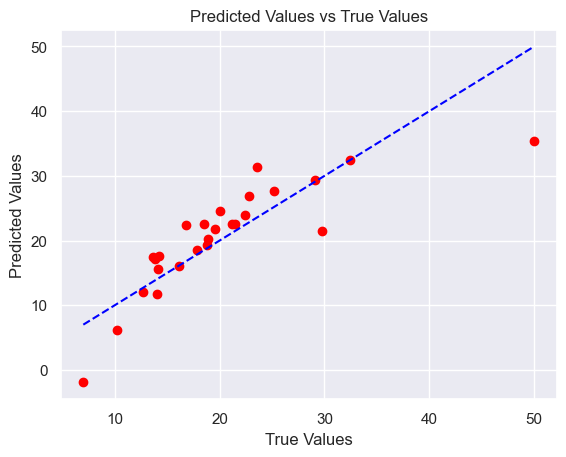

In [13]:
sns.set_theme()
plt.scatter(df_3['Y_test'], df_3['y_pred'], color='red')
plt.plot([min(df_3['Y_test']), max(df_3['Y_test'])],[min(df_3['Y_test']), max(df_3['Y_test'])], color='blue', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs True Values')
plt.show()

### <div dir = 'rtl'>بررسی صحت مدل </div>

In [14]:
mse = mean_squared_error(Y_test,y_predict)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 22.64884280229196


In [15]:
r2 = r2_score(Y_test, y_predict)
print('r2_score :',r2)

r2_score : 0.6776465710042816


##  <div dir = 'rtl'> برازش مدل با استفاده از کتابخانه statsmodels :</div>

In [16]:
y = df_1.iloc[Y_train.index,8]
X = df_1.drop(columns=['medv']).iloc[X_train.index]
X = sm.add_constant(X)
model_3 = sm.OLS(y, X).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     110.4
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          5.63e-103
Time:                        19:11:30   Log-Likelihood:                -1493.4
No. Observations:                 480   AIC:                             3005.
Df Residuals:                     471   BIC:                             3042.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.4376      3.957     16.790      0.0

## <div dir = 'rtl'>بررسی نرمالیتی مانده ها </div>
<div dir = 'rtl'>
 با توجه به مرحله قبل حال به بررسی نرمالیتی مانده ها می پردازیم
 
آزمون مورد استفاده ما آزمون کلموگروف اسمیرنوف استفاده میکنیم 

اگر مقدار <code> p_value </code> بیشتر از 0.05 باشد نرمالیتی داده ها تایید میشود 
</code>

In [17]:
stats.kstest(df_3['e'],'norm')

KstestResult(statistic=np.float64(0.4411329708567787), pvalue=np.float64(3.986369825549642e-05), statistic_location=np.float64(-1.296924588684739), statistic_sign=np.int8(1))

<div dir = 'rtl'>
با توجه به توضیحات بالا فرض نرمالیتی رد میشود 
</div>

## <div dir = 'rtl'>بررسی همگنی واریانس های مانده ها </div>
<div dir = "rtl">
<code>het_breuschpagan</code> آزمون یک آزمون آماری است که برای بررسی وجود <code>heteroscedastic</code> یا ناهمسانی واریانس در یک مدل رگرسیون استفاده میشود .این آزمون برابر با همسانی واریانس قرار میدهد وو فرضیه مقابل را برابر با وجود رابطه بین واریانس خطاها و متغیرهای توضیحی قرار می دهد. اگر مقدار p-value آزمون کمتر از سطح معناداری باشد، فرضیه صفر رد می شود و نتیجه می گیریم که هتروسکداستیسیته وجود دارد. این آزمون دو نسخه دارد: نسخه اصلی که فرض می کند خطاها نرمال هستند و نسخه روباست  <code>(robust)</code> که فرض می کند خطاها مستقل و یکسان توزیع هستند. 
که در مدل ما همگنی واریانس پذیرفته میشود 
</div>

In [18]:
X = df_1.iloc[:,:8]
X['intercept'] = model.intercept_
X
X = X.iloc[Y_test.index,[8,0,1,2,3,4,5,6,7]]
_, p_value, _, _ = het_breuschpagan(e, X)
if p_value < 0.05:
    print("The residuals are heteroscedastic.")
else:
    print("The residuals are homoscedastic.")

The residuals are homoscedastic.


## <div dir = 'rtl'> رسم نمودار خود همبستگی داده ها </div>

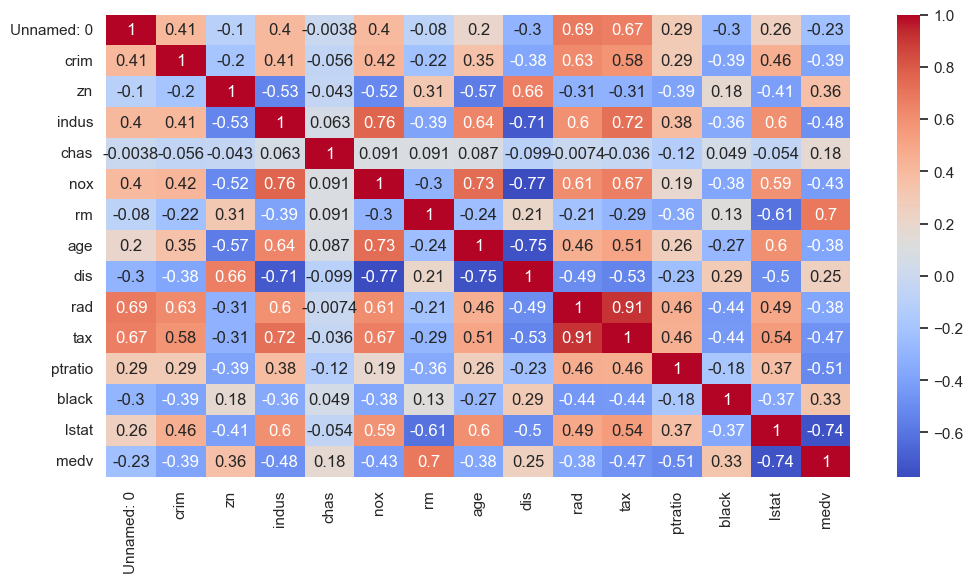

In [19]:
figure = plt.subplots(figsize = (12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

## <div dir = 'rtl'> نمایش عامل تورم واریانس </div>
<div dir = 'rtl'>
عامل تورم واریانس (Variance Inflation Factor یا VIF) یک شاخص آماری است که شدت هم‌خطی چندگانه را در تحلیل رگرسیون کمترین مربعات معمولی ارزیابی می‌کند. به بیان ساده، این شاخص 


نشان می‌دهد که یک متغیر مستقل تا چه اندازه تحت تأثیر دیگر متغیرهای مستقل قرار دارد و رفتار آن تغییر می‌کند.

به عنوان یک قاعده تجربی، اگر مقدار VIF بزرگتر از ۵ باشد، هم‌خطی بالا است و ممکن است نتایج تحلیل رگرسیون را تحت تأثیر قرار دهد. این شاخص به محققان کمک می‌کند تا متغیرهایی که ممکن است باعث هم‌خطی شوند را شناسایی و مدیریت کنند. 
</div>

In [20]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,intercept,758.232260
1,crim,12.553876
2,indus,2.720382
3,nox,5.057282
4,age,4.594024
5,dis,3.747718
6,ptratio,2.030086
7,black,9.045263
8,lstat,5.692713


<div dir = 'rtl'>
مشاهده میشود که همخطی محسوسی بین عوامل وجود دارد پس به سراغ متد <code>PCA</code> میرویم 
</div>

## <div dir = 'rtl'> آماده سازی و پیاده سازی متد PCA </div>
<div dir = 'rtl'>
برای این متد نیاز مند آنیم که توضیح واریانس را روی 0.95 درصد نگه داریم 
</div>

In [21]:
pca = PCA(n_components=0.95)  
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)


### <div dir = 'rtl'>برازش مدل  :</div> 

In [22]:
model_PCA = LinearRegression()
model_PCA.fit(X_pca_train, Y_train)

LinearRegression()

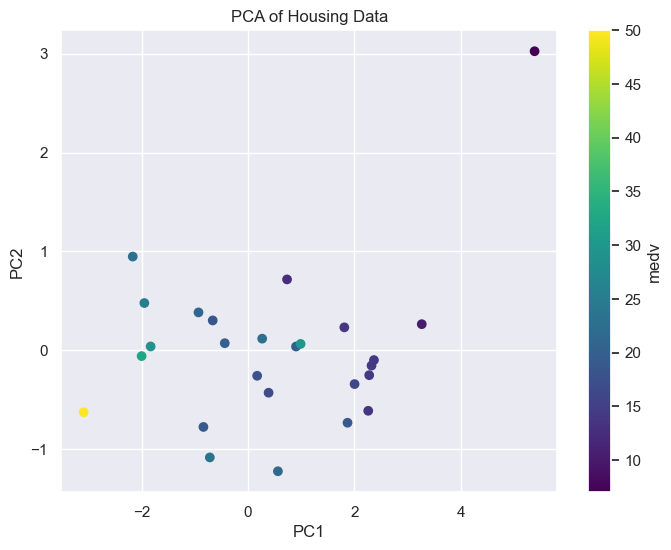

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=Y_test, cmap='viridis')
plt.colorbar(label='medv')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Housing Data')
plt.show()

### <div dir = 'rtl'>صحت مدل PCA :</div>

In [24]:
y_pred_1 = model_PCA.predict(X_pca_test)
mse = mean_squared_error(Y_test, y_pred_1)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 22.52022222310147


### <div dir = 'rtl'>توضیحات مربوط به عامل ها  :</div>

In [25]:
explained_variance = pca.explained_variance_ratio_
components = pca.components_

print(explained_variance,":نسبت واریانس توضیح داده شده ")
com_show = pd.DataFrame(components,columns=['X1','X2','X3','X4','X5','X6','X7','X8'],index=['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6'])
sum_row = com_show.sum().to_frame().T
sum_row.index = ['Sum']
com_show = pd.concat([com_show, sum_row])
com_show

[0.53868239 0.12836272 0.10536656 0.07606133 0.05938822 0.04352946] :نسبت واریانس توضیح داده شده 


,X1,X2,X3,X4,X5,X6,X7,X8
PCA_1,0.289483,0.416998,0.421283,0.400215,-0.402978,0.206606,-0.248059,0.371551
PCA_2,0.408047,-0.077037,-0.284687,-0.280365,0.326304,0.640797,-0.357178,0.152446
PCA_3,-0.263847,0.110582,-0.077038,0.138191,-0.062830,0.615253,0.709695,0.083508
PCA_4,0.809997,-0.120899,-0.012771,-0.013251,-0.025828,-0.233370,0.523043,-0.015690
PCA_5,-0.136214,-0.145572,-0.069907,0.060720,0.343340,-0.258507,0.104824,0.869474
PCA_6,-0.024028,0.666987,0.246393,-0.651407,0.186641,-0.106846,0.143950,0.050385
Sum,1.083439,0.851059,0.223273,-0.345896,0.364650,0.863932,0.876276,1.511673


In [26]:
pca.explained_variance_

array([4.31845592, 1.02904563, 0.84469223, 0.60976098, 0.47609765,
       0.34896268])

In [27]:
print(pca.noise_variance_)

0.1948431844196398


<div dir = 'rtl'>
 این مقدار نشان‌دهنده‌ی میزان واریانس داده‌هایی است که توسط مولفه‌های اصلی توضیح داده نمی‌شوند و به عنوان نویز در نظر گرفته می‌شوند. به عبارت دیگر، این واریانس نشان‌دهنده‌ی بخشی از داده‌هاست که توسط مولفه‌های اصلی قابل توضیح نیست و به عنوان نویز در داده‌ها وجود دارد.
</div>


# <div dir ='rtl'> پروژه دوم  </div>

## <div dir = 'rtl'> مشکل <code>overfitting</code>  </div>
<div dir = 'rtl'>
برای چه ما نیاز به <code>Regularization</code> داریم 

 <code>overfitting</code>  هنگامی می اید که مشاهدات به صورت کامل در دسترس باشند برای همین موجب ضعف در پدید امدن <code>generalization</code> چون دیگر داده ای برای پیش بینی وجود ندارد بنابراین این متد باعث جلوگیری از  <code>overfitting</code>  به وسیله ی محدود کردن پیچیدگی مدل میشود
</div>

## <div dir = 'rtl'> مفاهیم رگرسیون های <code>Lasso</code> و <code>Ridge</code> و <code> Elastic Net</code></div> 
<div dir = 'rtl'>
این متد ها گونه های مختلفی از <code> regularizalion</code> هستند که شامل متد های ذکر شده در بالا میباشند 

<code>L1 regularization </code>با استفاده از صفر کردن برخی از ضرایب باعث ارتقای پراکندگی مدل میشود در صورتی که <code> L2 regularization</code> به هدف بی اثر شدن ضرایب عمل میکند ولی فقط در برخی موارد ضرایب را بی اثر می کند 
</div>


## <div dir = 'rtl'> مفهوم رگرسیون <code>Lasso</code> : </div>
<div dir = 'rtl'>
رگرسیون لاسو (Lasso Regression) یک روش آماری در تحلیل‌های چندمتغیره خطی است که هدف آن ساده‌سازی مدل‌ها با انتخاب تعداد کمتری از متغیرهای مستقل است. واژه “لاسو” به معنای طناب و کمند انداختن است و این روش نیز با استفاده از کمنداندازی، متغیرهای مناسب‌تر را از بقیه جدا کرده و مدل ساده‌تری ارائه می‌دهد.

در رگرسیون لاسو، هدف اصلی پیش‌بینی متغیر پاسخ (y) بر اساس داده‌های مشاهده شده از متغیرهای پیشگو (x) است. این روش با اضافه کردن یک جریمه به تابع هدف، باعث می‌شود که برخی از ضرایب متغیرهای مستقل به صفر برسند و در نتیجه مدل ساده‌تر و قابل تفسیرتری به دست آید
</div>

## <div dir = 'rtl'>پیدا کردن مقادیر بهینه برای  <code>alpha</code> با استفاده از  <code>corss-validation</code> </div>
<div dir ='rtl'>

برای پیدا کردن مقدار بهینه برای پارامتر α


در رگرسیون لاسو با استفاده از اعتبارسنجی متقابل (Cross-Validation)، می‌توانید از روش‌های مختلفی استفاده کنید. یکی از رایج‌ترین روش‌ها، استفاده از اعتبارسنجی متقابل k-تایی (k-fold cross-validation) است. در این روش، داده‌ها به k بخش تقسیم می‌شوند و مدل به تعداد k بار آموزش داده می‌شود، هر بار با استفاده از k-1 بخش از داده‌ها برای آموزش و یک بخش برای ارزیابی مدل.
مراحل کلی به این صورت است:

تقسیم داده‌ها: داده‌ها را به k بخش تقسیم کنید.
آموزش مدل: برای هر مقدار ممکن از
α


، مدل را k بار آموزش دهید. هر بار یکی از بخش‌ها را برای ارزیابی و بقیه را برای آموزش استفاده کنید.
محاسبه خطا: میانگین خطای ارزیابی را برای هر مقدار
α


محاسبه کنید.
انتخاب بهترین
α


: مقدار
α



</div>

In [ ]:
warnings.filterwarnings("ignore", message="Coordinate descent without L1 regularization")
warnings.filterwarnings("ignore", message="Objective did not converge")

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model_Lasso = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1,max_iter=10000)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
model_Lasso.fit(X_scaled,Y_train)
print("مقدار بهینه برای alpha:", model_Lasso.alpha_)

مقدار بهینه برای alpha: 0.03


# <div dir = 'rtl'> پیش بینی با استفاده از مقادیر <code> test </code>  </div>

In [29]:
X_test_scaled = scaler.transform(X_test) 
model_Lasso.predict(X_test_scaled)

array([31.10952803, 32.38946389, 17.40745659, 26.94528136, 16.18046864,
       24.4763494 , 18.52871442, 11.67699992, 21.64675442, 22.2899725 ,
       22.42236814, 20.19784616, -1.76278346, 22.55951885, 22.44469709,
       21.59739838, 19.26240565,  6.17461207, 35.24535524, 15.62950878,
       27.64967586, 29.28395466, 12.01435732, 23.87105533, 17.71530296,
       17.13309807])

# <div dir = 'rtl'>صحت مدل رگرسیون <code> Lasso </code></div>
<div dir = 'rtl'>
برای بررسی صحت مدل از تابع <code>MSE</code> استفاده میکنیم 
</div>

In [30]:
print('MSE FOR Lasso :',mean_squared_error(Y_test,model_Lasso.predict(X_test_scaled)))

MSE FOR Lasso : 22.345351776089085


# <div dir = 'rtl'>مفهوم رگرسیون <code>Ridge</code> :</div>
<div dir = 'rtl'>

رگرسیون ریج (Ridge Regression) یکی از تکنیک‌های رگرسیون منظم‌سازی است که برای کاهش بیش‌ برازش (overfitting) در مدل‌های رگرسیونی به کار می‌رود. این روش به جای حداقل‌سازی مجموع مربعات خطاها (OLS)، مجموع مربعات خطاها و مجموع مربعات ضرایب رگرسیون را با هم حداقل می‌کند. به عبارتی دیگر، یک جریمه به اندازه‌ی مجموع مربعات ضرایب به تابع هزینه اضافه می‌کند.

این تکنیک به ویژه زمانی مفید است که تعداد متغیرهای پیش‌بینی در مجموعه بیشتر از تعداد مشاهدات باشد یا زمانی که متغیرهای پیش‌بینی دارای همبستگی بالا باشند با اضافه کردن جملات جریمه L2 به تابع هدف، رگرسیون ریج کمک می‌کند تا پارامترهای مدل کوچکتر شوند و تعداد متغیرهای مستقل مهم در مدل کاهش یابد، 
</div>

# <div dir = 'rtl'> پیدا کردن بهترین <code>alpha</code> با استفاده از <code>GridSearchCV</code> و برازش مدل </div>
<div dir = 'rtl'>
GridSearchCV چیست؟
GridSearchCV یک روش جستجوی جامع برای پیدا کردن بهترین ترکیب پارامترها برای یک مدل است. این ابزار با استفاده از cross-validation، پارامترهای مختلف را امتحان می‌کند و بهترین ترکیب را انتخاب می‌کند.

مراحل استفاده از GridSearchCV
تعریف پارامترها:
ابتدا باید یک شبکه از پارامترها (parameter grid) تعریف کنید. این شبکه شامل پارامترهایی است که می‌خواهید امتحان کنید و مقادیر مختلف آن‌ها.
مثال: برای یک مدل Random Forest، ممکن است بخواهید تعداد درخت‌ها (n_estimators) و عمق درخت‌ها (max_depth) را امتحان کنید.

تنظیم Cross-Validation:
تعداد foldهای cross-validation را مشخص کنید. معمولاً 5 یا 10 fold استفاده می‌شود.

اجرای Grid Search:
GridSearchCV تمام ترکیب‌های ممکن از پارامترها را امتحان می‌کند و مدل را با استفاده از cross-validation ارزیابی می‌کند.

انتخاب بهترین مدل:
پس از اجرای Grid Search، بهترین ترکیب پارامترها انتخاب می‌شود و مدل نهایی با این پارامترها آموزش داده می‌شود.

</div>

In [31]:
ridge_reg = Ridge()
alpha_range = np.logspace(-3, 3, 50)
param_grid = {'alpha': alpha_range}
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha:.4f}")
best_model = grid_search.best_estimator_
y_pred_Ridge = best_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_Ridge)
print(f"Mean Squared Error with best alpha: {mse:.4f}")

Best alpha: 0.1600
Mean Squared Error with best alpha: 22.5357


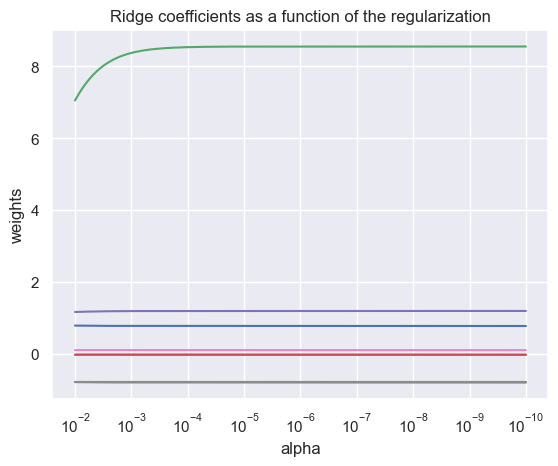

In [32]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_test, Y_test)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

# <div dir = 'rtl'>مقایسه L1 و L2 </div>
<div dir = 'rtl'>
با استفاده ار تفسیر هندسی ما متوجه کارایی بهتر <code>L1</code> نسبت به <code>L2</code> میشویم 

<code>L1</code> باعث بوجود امدن ناحیه الماس شکل است در صورتی که <code>L2</code> موجب تشکیل ناحیه ای دایره ای شکل است برخورد هر کدام با تابع زیان به ما نتیجه نهایی را ارایه میدهد 


رگرسیون Ridge و Lasso هر دو تکنیک‌های منظم‌سازی (regularization) هستند که برای جلوگیری از بیش‌ برازش (overfitting) در مدل‌های رگرسیون استفاده می‌شوند، اما تفاوت‌های کلیدی در نحوه اعمال جریمه‌ها دارند.

رگرسیون Ridge (L2 Regularization)

جریمه: در رگرسیون Ridge، جریمه‌ای به تابع هزینه اضافه می‌شود که برابر با مجموع مربعات ضرایب (وزن‌ها) است.
فرمول: Loss=MSE+λi=1∑n​wi2​

ویژگی‌ها: این جریمه باعث می‌شود که ضرایب کوچک شوند، اما هیچ‌کدام از ضرایب به صفر نمی‌رسند. این روش برای مواقعی که همه ویژگی‌ها مهم هستند و باید در مدل باقی بمانند، مناسب است.

رگرسیون Lasso (L1 Regularization)

جریمه: در رگرسیون Lasso، جریمه‌ای به تابع هزینه اضافه می‌شود که برابر با مجموع قدر مطلق ضرایب است.
فرمول: <code> Loss=MSE+λi=1∑ ​∣wi|n  </code>

ویژگی‌ها: این جریمه باعث می‌شود که برخی از ضرایب به صفر برسند، که به معنای حذف برخی از ویژگی‌ها از مدل است. این روش برای مواقعی که برخی از ویژگی‌ها غیرمهم هستند و باید حذف شوند، مناسب است.

تفاوت‌های کلیدی


نوع جریمه:

Ridge: مجموع مربعات ضرایب (L2).
Lasso: مجموع قدر مطلق ضرایب (L1).



اثر بر ضرایب:

Ridge: ضرایب کوچک می‌شوند ولی به صفر نمی‌رسند.
Lasso: برخی از ضرایب به صفر می‌رسند و ویژگی‌های غیرمهم حذف می‌شوند.



کاربرد:

Ridge: زمانی که همه ویژگی‌ها مهم هستند و باید در مدل باقی بمانند.
Lasso: زمانی که برخی از ویژگی‌ها غیرمهم هستند و باید حذف شوند.

</div>

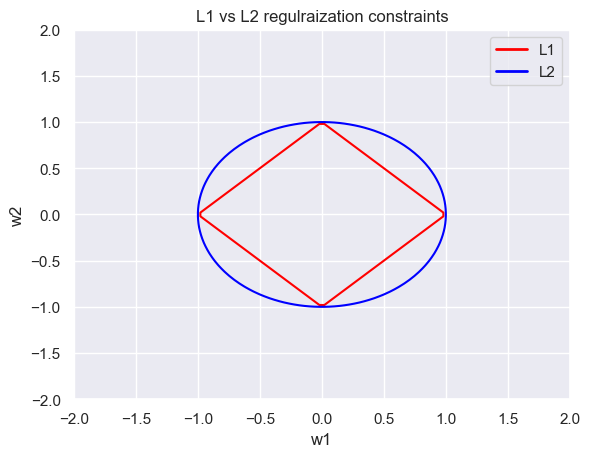

In [33]:
def L1_contour(X,Y,alpha):
    return np.abs(X) + np.abs(Y)-alpha
def L2_contour(X,Y,alpha):
    return x**2 + Y**2 - alpha**2
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x,y)
plt.contour(X,Y,L1_contour(X,Y,1),levels = [0],colors = 'red')
plt.contour(X,Y,L2_contour(X,Y,1),levels = [0],colors = 'blue')
legend_elements = [Line2D([0], [0], color='red', lw=2, label='L1'),
                   Line2D([0], [0], color='blue', lw=2, label='L2')]
plt.legend(handles=legend_elements)
plt.title('L1 vs L2 regulraization constraints')
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()

# <div dir='rtl'> مفهوم رگرسیون <code>Elastic Net</code> : </div>
<div dir= 'rtl'>
رگرسیون Elastic Net یک روش منظم‌سازی در آمار و یادگیری ماشین است که ترکیبی از دو تکنیک Lasso و Ridge را به کار می‌گیرد. این روش به خصوص در مواجهه با داده‌های با ابعاد بالا و همبستگی زیاد بین ویژگی‌ها بسیار مفید است.

ویژگی‌های کلیدی Elastic Net:

ترکیب L1 و L2: Elastic Net از ترکیب جریمه‌های L1 (Lasso) و L2 (Ridge) استفاده می‌کند. این ترکیب به مدل اجازه می‌دهد تا از مزایای هر دو روش بهره‌مند شود.
کاهش بیش‌برازش: با استفاده از این روش، می‌توان از بیش‌برازش (Overfitting) جلوگیری کرد و مدل‌های پایدارتر و قابل تعمیم‌تری ایجاد کرد.
انتخاب ویژگی‌ها: Elastic Net می‌تواند به طور همزمان ویژگی‌های مهم را انتخاب کرده و اثر ویژگی‌های کم‌اهمیت را کاهش دهد .
</div>

# <div dir = 'rtl'>برازش رگرسیون <code>Elastic Net</code> :</div>

In [34]:
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.1, 0.5, 0.9]}
model = ElasticNet()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(f'Best alpha: {best_params["alpha"]}, Best l1_ratio: {best_params["l1_ratio"]}')
best_model = grid_search.best_estimator_
y_pred_Elastic_Net = best_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_Elastic_Net)
print(f"Mean Squared Error with best alpha & best l1_ratio : {mse:.4f}")

Best alpha: 0.1, Best l1_ratio: 0.1
Mean Squared Error with best alpha & best l1_ratio : 22.2797


# <div dir ="rtl"> داده مربوط به بخش تحلیل عاملی :</div>
<div dir ="rtl">
 در این بخش ما داده های خود را از سایت <code>https://www.kaggle.com/datasets/ipravin/hair-customer-survey-data-for-100-customers</code> دانلود کردیم 

 توضیحات مربوط به داده به شرح زیر است : 

 
ID: شناسه یکتا برای هر نمونه.

ProdQual: کیفیت محصول.

Ecom: ارتباطات الکترونیکی.

TechSup: پشتیبانی تکنیکی.

CompRes: پاسخگویی به شکایات.

Advertising: تبلیغات.

ProdLine: خط تولید.

SalesFImage: تصویر فروش.

Com: ارتباطات.

Pricing: قیمت‌گذاری.

WartyClaim: شکایات ضمانت.

OrdBilling: سفارش و صورتحساب.

DelSpeed: سرعت تحویل.

Satisfaction: رضایت مشتری.

</div>

In [35]:
df_F = pd.read_csv('Factor-Hair-Revised.csv')
df_F

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6,7.3
96,97,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7,6.3
97,98,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5,5.4
98,99,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9,6.4


In [36]:
df_F.isna().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [37]:
df_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


# <div dir ="rtl"> مشاهده خصیصه های داده ها تحلیل عاملی :</div>

In [38]:
df_F.describe()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,7.810000,3.672000,5.365000,5.442000,4.010000,5.805000,5.12300,6.974000,6.043000,4.27800,3.886000,6.918000
std,29.011492,1.396279,0.700516,1.530457,1.208403,1.126943,1.315285,1.07232,1.545055,0.819738,0.92884,0.734437,1.191839
min,1.000000,5.000000,2.200000,1.300000,2.600000,1.900000,2.300000,2.90000,3.700000,4.100000,2.00000,1.600000,4.700000
25%,25.750000,6.575000,3.275000,4.250000,4.600000,3.175000,4.700000,4.50000,5.875000,5.400000,3.70000,3.400000,6.000000
50%,50.500000,8.000000,3.600000,5.400000,5.450000,4.000000,5.750000,4.90000,7.100000,6.100000,4.40000,3.900000,7.050000
75%,75.250000,9.100000,3.925000,6.625000,6.325000,4.800000,6.800000,5.80000,8.400000,6.600000,4.80000,4.425000,7.625000
max,100.000000,10.000000,5.700000,8.500000,7.800000,6.500000,8.400000,8.20000,9.900000,8.100000,6.70000,5.500000,9.900000


In [39]:
Y_f = df_F['Satisfaction']
df_F.drop(columns=['ID','Satisfaction'],inplace= True)
scaler = StandardScaler()
df_F_scaled = scaler.fit_transform(df_F)

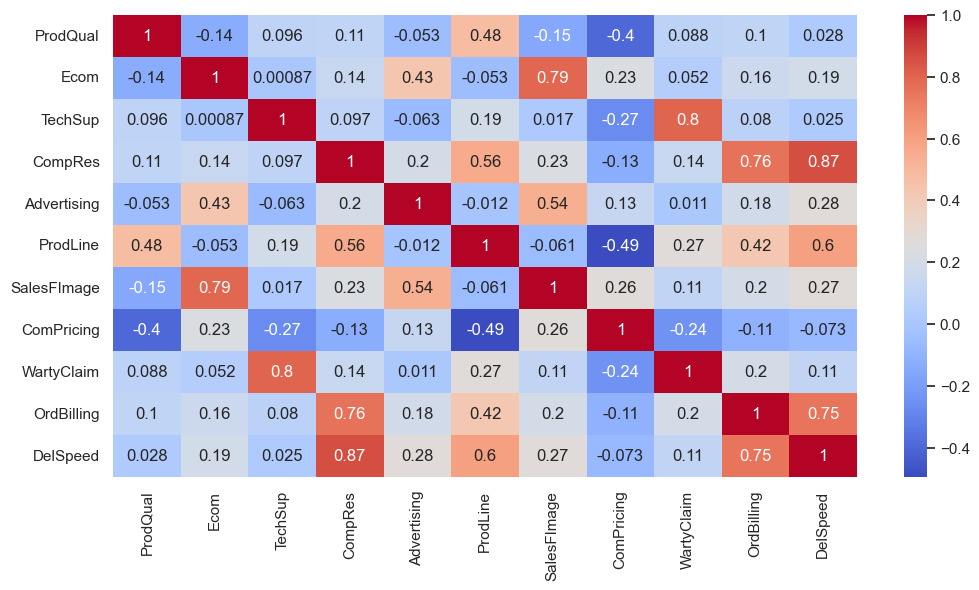

In [40]:
df_F_scaled = pd.DataFrame(df_F_scaled)
figure = plt.subplots(figsize = (12,6))
sns.heatmap(df_F.corr(), annot=True, cmap='coolwarm');

# <div dir ="rtl"> آزمون های لازم  :</div>
<div dir='rtl'>

آزمون بارتلت (Bartlett’s Test of Sphericity)

این آزمون بررسی می‌کند که آیا ماتریس همبستگی داده‌ها به اندازه کافی با هم مرتبط هستند تا تحلیل عاملی معنادار باشد.

Chi-square value = 769.64 : مقدار آزمون کای-اسکور.

p-value = 1.66e-120 : مقدار پی-ولیو. این مقدار بسیار کوچک است و نشان می‌دهد که فرض صفر (اینکه ماتریس همبستگی یک ماتریس هویت است) رد می‌شود. به عبارت دیگر، داده‌های ما برای تحلیل عاملی مناسب هستند.

شاخص کفایت نمونه‌گیری KMO (Kaiser-Meyer-Olkin)
این شاخص بررسی می‌کند که آیا داده‌های ما برای تحلیل عاملی مناسب هستند یا نه.

KMO = 0.66: این مقدار نشان‌دهنده کفایت نمونه‌گیری است. مقادیری بین 0.6 تا 0.7 نشان می‌دهند که داده‌ها به طور متوسط برای تحلیل عاملی مناسب هستند، اما می‌توانند بهتر باشند.
</div>

In [41]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_F_scaled)
kmo_all, kmo_model = calculate_kmo(df_F_scaled)
print(f"Bartlett's Test: Chi-square value = {chi_square_value}, p-value = {p_value}")
print(f"KMO: {kmo_model}")

Bartlett's Test: Chi-square value = 619.2725577964158, p-value = 1.793370009363654e-96
KMO: 0.6531422230688922


# <div dir='rtl'>اما سوال مهم آن است که ما به چه مقدار از عامل ها نیاز داریم؟</div>
<div dir='rtl'>

اگر فراوانی تجمع نسبت واریانس حدود ۸۰ درصد و بیشتر شد تعداد مولفه های اصلی ما را نشان می دهد ولی پاسخ دقیقی به این سوال نیست. 


به علت عدم وجود معیاری مشخص برای نسبت تجمعی واریانس ما از screeplot استفاده می کنیم


چند عامل نیاز داریم؟
در هر دو متد screeplot  و eigenvalue criterion با استفاده از مرتب کردن مقادیر ویژه نتیجه گیری لازمه را می کنیم


Eigenvalue criterion 

به صورت شهودی تعداد مقادیر ویژه بالاتر از یک برابر با تعداد عوامل ما است.


Scree-Test 
در Scree Plot تعداد عوامل به صورت شهودی در پیچ خوردگی های گراف در نمودار مشخص می شود.

با مشاهده خروجی هر دو متد جواب یکسانی برای تعداد عوامل به دست می آوریم.

</div>

In [42]:
fa = FactorAnalyzer(rotation=None , method='principal')
fa.fit(df_F_scaled)

FactorAnalyzer(method='principal', rotation=None, rotation_kwargs={})

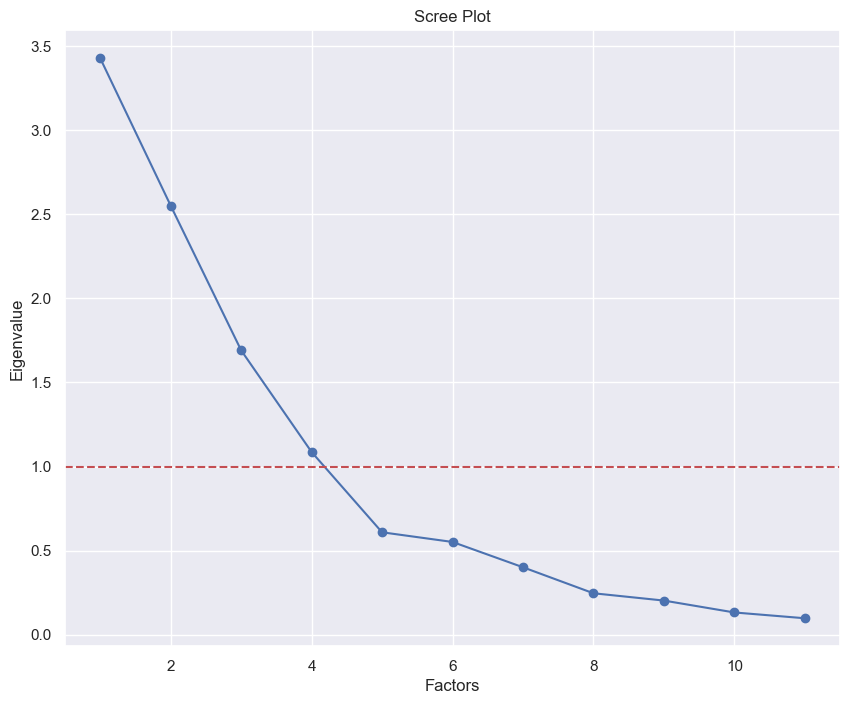

array([3.42697133, 2.55089671, 1.69097648, 1.08655606, 0.60942409,
       0.55188378, 0.40151815, 0.24695154, 0.20355327, 0.13284158,
       0.09842702])

In [43]:
ev, v = fa.get_eigenvalues()
plt.figure(figsize=(10, 8))
plt.scatter(range(1, df_F_scaled.shape[1] + 1), ev)
plt.plot(range(1, df_F_scaled.shape[1] + 1), ev, 'b-')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='--')  
plt.grid(True)
plt.show()
ev

# <div dir = 'rtl'> تحلیل عاملی اکتشافی  چیست<code>(EFA)</code> ؟ </div> 
<div dir ="rtl">

تحلیل عاملی اکتشافی چیست؟
اگر یک دیتا ستی با متغیرهای گوناگون موجود باشد ممکن است بعضی از آن ها به هم مرتبط باشند یعنی به زبان ساده با هم همبستگی داشته باشند. 
(این همبستگی ها پایه تحلیل عاملی است)

وظیفه تحلیل عاملی آن است که این متغیر ها رو به خوشه هایی تبدیل کند که همبستگی زیادی باهم دارند.

به طور خلاصه داریم
تحلیل عاملی ترکیب متغیرهایی با همبستگی زیاد با یکدیگر است. 
مشاهده می شود که دلیل این همبستگی متغیر های غیر قابل اندازه گیری ای است که عامل نامیده می شود.
</div>

# <div dir='rtl'>تبدیل متعامد (varimax) :</div> 


Varimax Rotation Results:

Factor Loadings:
             costumers_satisfaction  E-commerce  Technical Support  \
ProdQual                      0.002      -0.013             -0.033   
Ecom                          0.057       0.871              0.047   
TechSup                       0.018      -0.024              0.939   
CompRes                       0.926       0.116              0.049   
Advertising                   0.139       0.742             -0.082   
ProdLine                      0.591      -0.064              0.146   
SalesFImage                   0.133       0.900              0.076   
ComPricing                   -0.085       0.226             -0.246   
WartyClaim                    0.110       0.055              0.931   
OrdBilling                    0.864       0.107              0.084   
DelSpeed                      0.938       0.177             -0.005   

             Product Quality  
ProdQual               0.876  
Ecom                  -0.117  
TechSup              

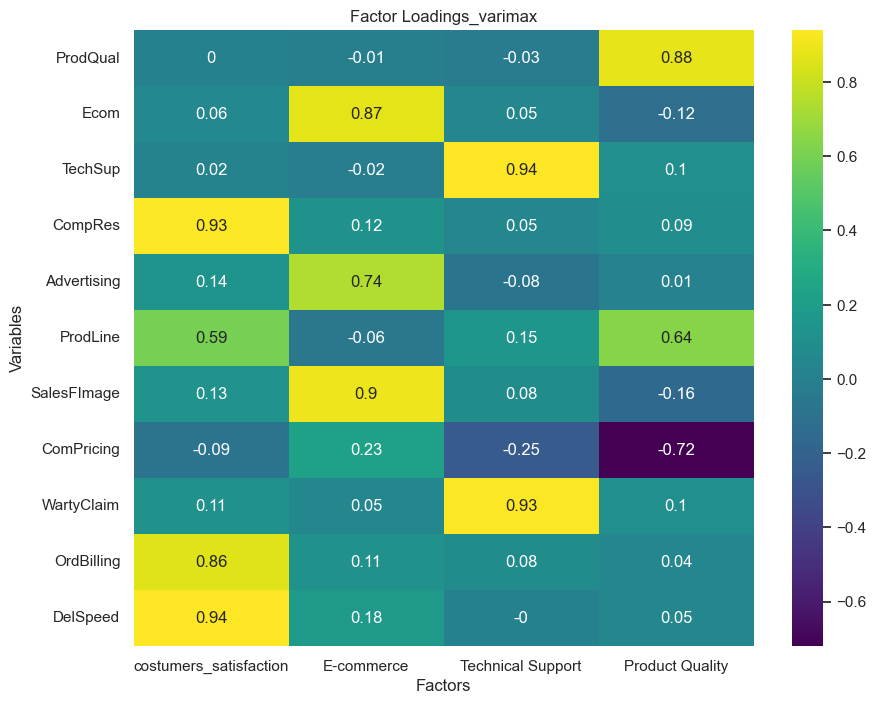

In [44]:
fa_varimax = FactorAnalyzer(n_factors=4, rotation='varimax', method='principal')
fa_varimax.fit(df_F_scaled)
communalities_varimax = fa_varimax.get_communalities()
uniquenesses_varimax = fa_varimax.get_uniquenesses()
loadings_varimax = fa_varimax.loadings_
variance_varimax = fa_varimax.get_factor_variance()
variance_df_varimax = pd.DataFrame(variance_varimax, index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
variable_names = df_F.columns

results_varimax = {
    "Factor Loadings": pd.DataFrame(np.round(loadings_varimax, 3), index=variable_names, columns=['costumers_satisfaction', 'E-commerce', 'Technical Support','Product Quality']),
    "Communalities": pd.DataFrame(np.round(communalities_varimax, 3), index=variable_names, columns=['Communality']),
    "Uniquenesses": pd.DataFrame(np.round(uniquenesses_varimax, 3), index=variable_names, columns=['Uniqueness']),
    "Factor Variances": variance_df_varimax
}

print("\nVarimax Rotation Results:\n")
for key, value in results_varimax.items():
    print(f"{key}:\n{value}\n")

factor_scores = fa_varimax.transform(df_F_scaled)
scores_df = pd.DataFrame(factor_scores, columns=[f"Factor{i+1}" for i in range(factor_scores.shape[1])])
print("Factor Scores:\n", scores_df)

plt.figure(figsize=(10, 8))
sns.heatmap(np.round(loadings_varimax, 2), annot=True, cmap='viridis', xticklabels=['costumers_satisfaction', 'E-commerce', 'Technical Support','Product Quality'],yticklabels=df_F.columns)
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.title('Factor Loadings_varimax')
plt.show()

# <div dir='rtl'>تبدیل اریب (oblimin) :</div> 


Oblimin Rotation Results:

Factor Loadings:
             costumers_satisfaction  E-commerce  Technical Support  \
ProdQual                     -0.101       0.073             -0.080   
Ecom                         -0.037       0.887              0.039   
TechSup                      -0.051      -0.015              0.951   
CompRes                       0.939       0.005             -0.000   
Advertising                   0.057       0.754             -0.102   
ProdLine                      0.538      -0.083              0.088   
SalesFImage                   0.042       0.904              0.066   
ComPricing                   -0.013       0.174             -0.211   
WartyClaim                    0.035       0.055              0.937   
OrdBilling                    0.879      -0.001              0.042   
DelSpeed                      0.952       0.063             -0.054   

             Product Quality  
ProdQual               0.915  
Ecom                  -0.002  
TechSup              

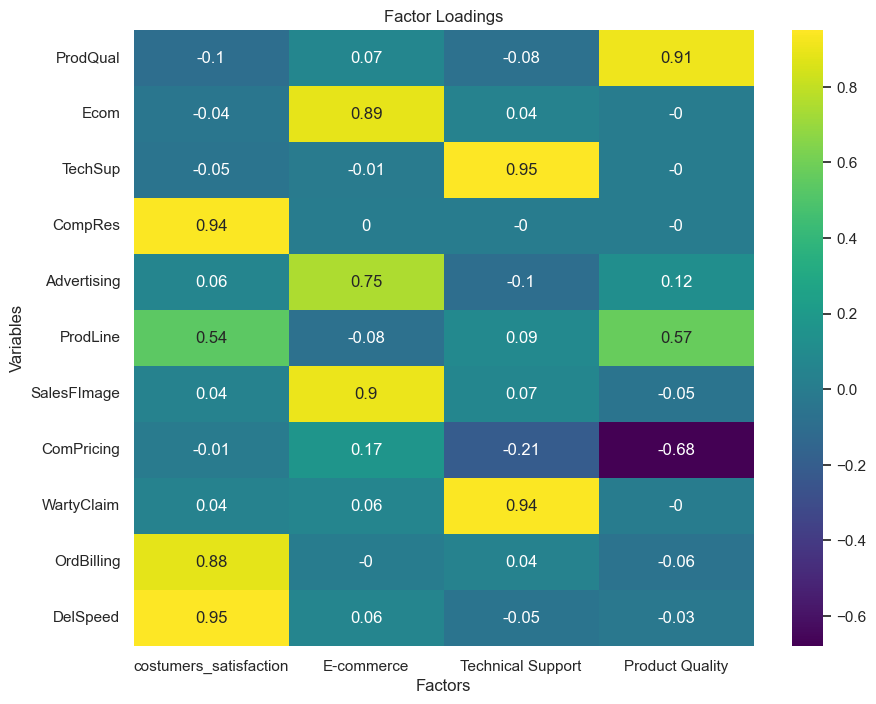

In [45]:
fa_oblimin = FactorAnalyzer(n_factors=4, rotation='oblimin', method='principal')
fa_oblimin.fit(df_F_scaled)
communalities_oblimin = fa_oblimin.get_communalities()
uniquenesses_oblimin = fa_oblimin.get_uniquenesses()
loadings_oblimin = fa_oblimin.loadings_
variance_oblimin = fa_oblimin.get_factor_variance()
variance_df_oblimin = pd.DataFrame(variance_oblimin, index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])

results_oblimin = {
    "Factor Loadings": pd.DataFrame(np.round(loadings_oblimin, 3), index=variable_names, columns=['costumers_satisfaction', 'E-commerce', 'Technical Support','Product Quality']),
    "Communalities": pd.DataFrame(np.round(communalities_oblimin, 3), index=variable_names, columns=['Communality']),
    "Uniquenesses": pd.DataFrame(np.round(uniquenesses_oblimin, 3), index=variable_names, columns=['Uniqueness']),
    "Factor Variances": variance_df_oblimin
}

print("\nOblimin Rotation Results:\n")
for key, value in results_oblimin.items():
    print(f"{key}:\n{value}\n")
plt.figure(figsize=(10, 8))
sns.heatmap(np.round(loadings_oblimin, 2), annot=True, cmap='viridis', xticklabels=['costumers_satisfaction', 'E-commerce', 'Technical Support','Product Quality'],yticklabels=df_F.columns)
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.title('Factor Loadings')
plt.show()


# <div dir='rtl'> مقایسه تبدیل متعامد (varimax) و تبدیل اریب (oblimin) :</div> 

Varimax Factor Loadings:
             costumers_satisfaction  E-commerce  Technical Support  \
ProdQual                      0.002      -0.013             -0.033   
Ecom                          0.057       0.871              0.047   
TechSup                       0.018      -0.024              0.939   
CompRes                       0.926       0.116              0.049   
Advertising                   0.139       0.742             -0.082   
ProdLine                      0.591      -0.064              0.146   
SalesFImage                   0.133       0.900              0.076   
ComPricing                   -0.085       0.226             -0.246   
WartyClaim                    0.110       0.055              0.931   
OrdBilling                    0.864       0.107              0.084   
DelSpeed                      0.938       0.177             -0.005   

             Product Quality  
ProdQual               0.876  
Ecom                  -0.117  
TechSup                0.101  
CompRes   

Text(0.5, 33.109374999999986, 'Factors')

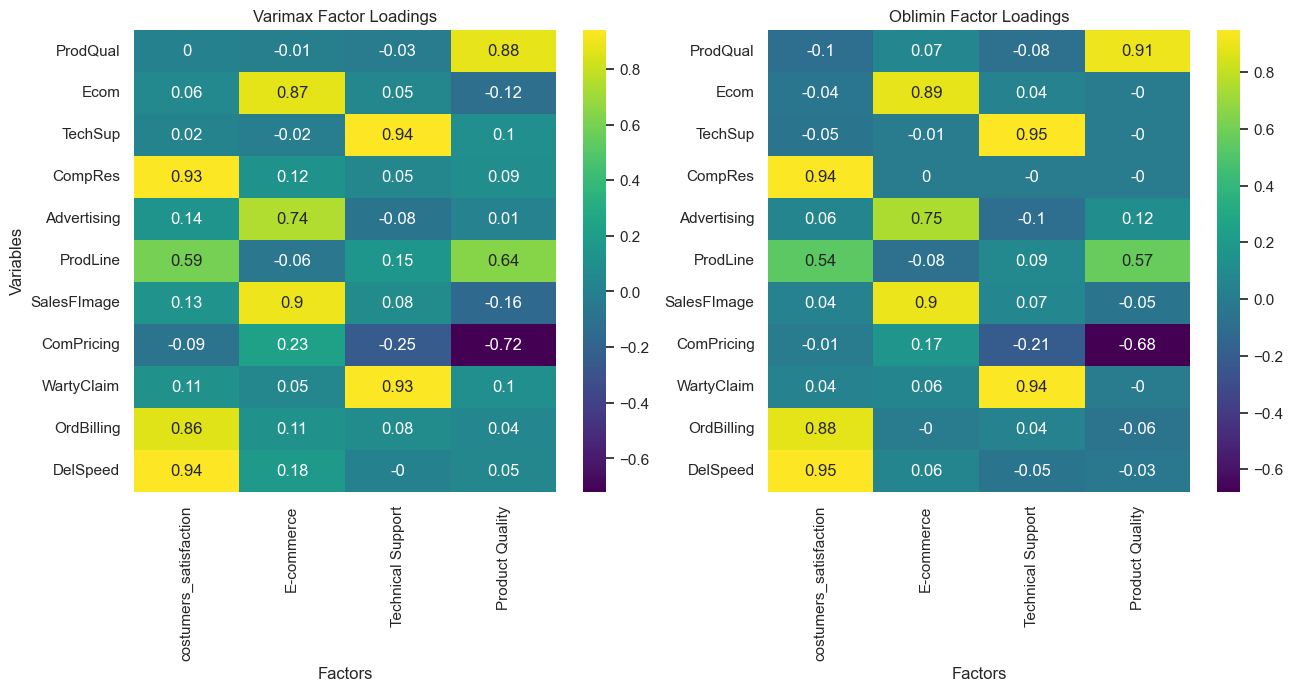

In [46]:
comparison = {
    "Varimax Factor Loadings": results_varimax["Factor Loadings"],
    "Oblimin Factor Loadings": results_oblimin["Factor Loadings"],
    "Varimax Communalities": results_varimax["Communalities"],
    "Oblimin Communalities": results_oblimin["Communalities"],
    "Varimax Uniquenesses": results_varimax["Uniquenesses"],
    "Oblimin Uniquenesses": results_oblimin["Uniquenesses"],
    "Varimax Factor Variances": results_varimax["Factor Variances"],
    "Oblimin Factor Variances": results_oblimin["Factor Variances"]
}

for key, value in comparison.items():
    print(f"{key}:\n{value}\n")
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(np.round(loadings_varimax, 2), ax=ax[0], annot=True, cmap='viridis', xticklabels=['costumers_satisfaction', 'E-commerce', 'Technical Support','Product Quality'], yticklabels=variable_names)
sns.heatmap(np.round(loadings_oblimin, 2), ax=ax[1], annot=True, cmap='viridis', xticklabels=['costumers_satisfaction', 'E-commerce', 'Technical Support','Product Quality'], yticklabels=variable_names)
ax[0].set_title('Varimax Factor Loadings')
ax[0].set_xlabel('Factors')
ax[0].set_ylabel('Variables')
ax[1].set_title('Oblimin Factor Loadings')
ax[1].set_xlabel('Factors')


In [47]:
loadings_varimax = results_varimax["Factor Loadings"]
data = df_F_scaled  
score_matrix_varimax = np.dot(data, loadings_varimax)

loadings_oblimin = results_oblimin["Factor Loadings"]
score_matrix_oblimin = np.dot(data, loadings_oblimin)

RMSE_varimax : 0.7647721973021723


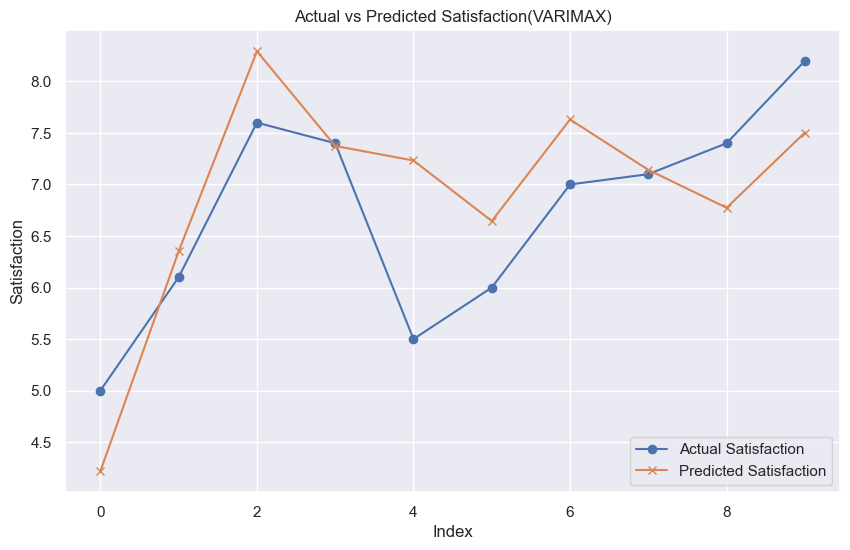

In [48]:
X_varimax = score_matrix_varimax
X_oblimin = score_matrix_oblimin
Y_f
X_train_varimax,X_test_varimax,y_train_varimax,y_test_varimax = model_selection.train_test_split(X_varimax,Y_f,test_size=0.1,random_state=42)
model_f = LinearRegression().fit(X_train_varimax,y_train_varimax)
y_f_pred = model_f.predict(X_test_varimax)
rmse = np.sqrt(mean_squared_error(y_test_varimax, y_f_pred))
print(f"RMSE_varimax : {rmse}")
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_varimax)), y_test_varimax, label='Actual Satisfaction', marker='o')
plt.plot(range(len(y_test_varimax)), y_f_pred, label='Predicted Satisfaction', marker='x')
plt.xlabel("Index")
plt.ylabel("Satisfaction")
plt.title("Actual vs Predicted Satisfaction(VARIMAX)")
plt.legend()
plt.grid(True)
plt.show();

RMSE_varimax : 0.7646233485762457


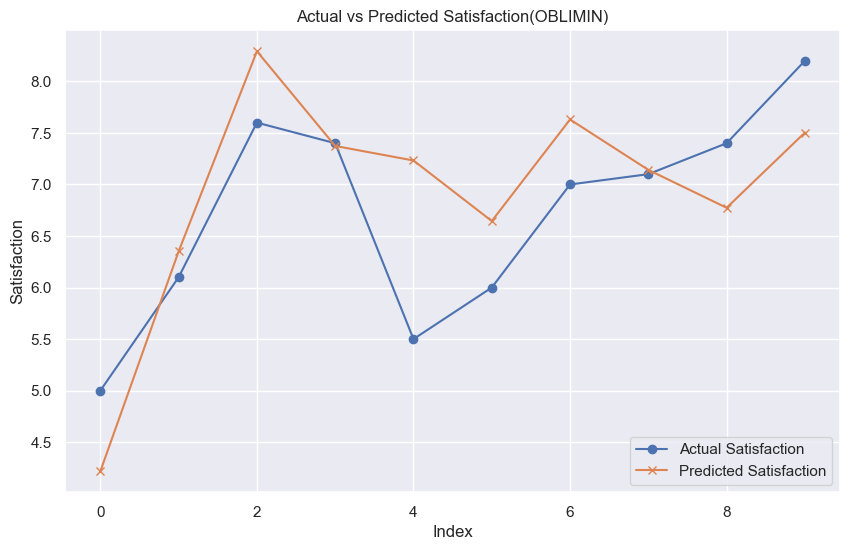

In [49]:
X_train_oblimin,X_test_oblimin,y_train_oblimin,y_test_oblimin = model_selection.train_test_split(X_oblimin,Y_f,test_size=0.1,random_state=42)
model_f = LinearRegression().fit(X_train_oblimin,y_train_oblimin)
y_f_pred_oblimin = model_f.predict(X_test_oblimin)
rmse = np.sqrt(mean_squared_error(y_test_varimax, y_f_pred_oblimin))
print(f"RMSE_varimax : {rmse}")
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_varimax)), y_test_varimax, label='Actual Satisfaction', marker='o')
plt.plot(range(len(y_test_varimax)), y_f_pred, label='Predicted Satisfaction', marker='x')
plt.xlabel("Index")
plt.ylabel("Satisfaction")
plt.title("Actual vs Predicted Satisfaction(OBLIMIN)")
plt.legend()
plt.grid(True)
plt.show();